In [26]:
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline
import seaborn as sns
import plotly
import plotly.express as px

In [27]:
covid_data = pd.read_csv('data/covid_data.csv')
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date            306429 non-null  object 
 1   province/state  228326 non-null  object 
 2   country         306429 non-null  object 
 3   confirmed       306429 non-null  float64
 4   deaths          306429 non-null  float64
 5   recovered       306429 non-null  float64
dtypes: float64(3), object(3)
memory usage: 14.0+ MB


In [28]:
vaccinations_data = pd.read_csv('data/country_vaccinations.csv')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]

In [29]:
covid_data = covid_data.groupby(
    ['date', 'country'], 
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()

In [30]:
covid_data['date'] = pd.to_datetime(covid_data['date'])

In [31]:
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']

In [32]:
covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()

In [33]:
covid_data

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered
11337,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN
11570,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
11807,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12051,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12299,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
15933,2020-03-12,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16595,2020-03-14,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16938,2020-03-15,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17290,2020-03-16,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])

In [35]:
covid_data['date'].max()


Timestamp('2021-05-29 00:00:00')

In [36]:
covid_data['date'].min()

Timestamp('2020-01-22 00:00:00')

In [37]:
print(vaccinations_data['date'].min(), vaccinations_data['date'].max())

2020-12-02 00:00:00 2021-09-06 00:00:00


In [38]:
start_date = '2020-01-22'
end_date = '2021-05-29'

# Filter both DataFrames by the date range
covid_data_filtered = covid_data[(covid_data['date'] >= start_date) & (covid_data['date'] <= end_date)]
vaccinations_data_filtered = vaccinations_data[(vaccinations_data['date'] >= start_date) & (vaccinations_data['date'] <= end_date)]

# Merge the filtered DataFrames on 'date' and 'country' columns with a 'left' join
covid_df = covid_data_filtered.merge(vaccinations_data_filtered, on=['date', 'country'], how='left')

# Resulting merged DataFrame
display(covid_df)

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86780,2020-03-12,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86781,2020-03-14,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86782,2020-03-15,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86783,2020-03-16,occupied Palestinian territory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
covid_df['death_rate'] = (covid_df['deaths']/covid_df['confirmed'])*100
covid_df['recover_rate'] = (covid_df['recovered']/covid_df['confirmed'])*100

In [40]:
usa_df = covid_df[covid_df['country'] == 'United States']

In [41]:
display(usa_df['death_rate'].max())

np.float64(7.18954248366013)

In [42]:
ru_df = covid_df[covid_df['country'] == 'Russia']
ru_df['recover_rate']

64183     0.000000
64184     0.000000
64185     0.000000
64186     0.000000
64187     0.000000
           ...    
64663    92.323798
64664    92.351695
64665    92.379090
64666    92.395765
64667    92.409520
Name: recover_rate, Length: 485, dtype: float64

<Axes: xlabel='country'>

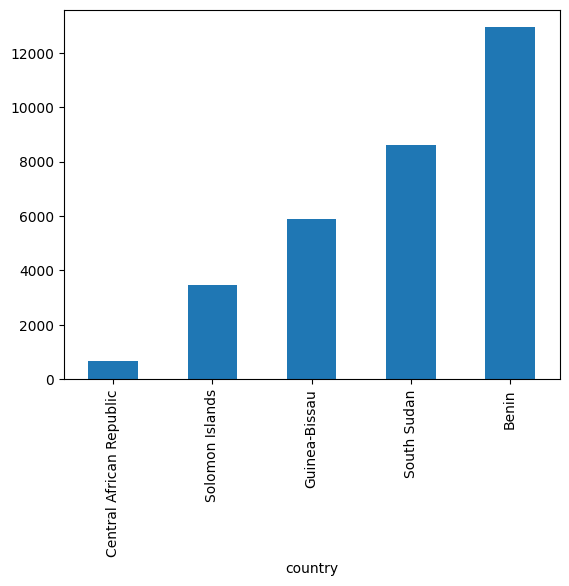

In [43]:
covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar')

In [44]:
countries = ['Russia', 'Australia', 'Germany', 'Canada', 'United Kingdom']
croped_covid_df = covid_df[covid_df['country'].isin(countries)]

populations = pd.DataFrame([
    ['Canada', 37664517],
    ['Germany', 83721496],
    ['Russia', 145975300],
    ['Australia', 25726900],
    ['United Kingdom', 67802690]
    ],
    columns=['country', 'population']
)
croped_covid_df = croped_covid_df.merge(populations, on=['country'])
croped_covid_df['daily_confirmed_per_hundred'] = croped_covid_df['daily_confirmed'] / croped_covid_df['population'] * 100
croped_covid_df.head()

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,death_rate,recover_rate,population,daily_confirmed_per_hundred
0,2020-01-23,Australia,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25726900,NaN
1,2020-01-25,Australia,4.0,0.0,0.0,4.0,4.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000016
2,2020-01-26,Australia,4.0,0.0,0.0,4.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000
3,2020-01-27,Australia,5.0,0.0,0.0,5.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000004
4,2020-01-28,Australia,5.0,0.0,0.0,5.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,25726900,0.000000


In [45]:
croped_covid_df['confirmed_per_hundred'] = (croped_covid_df['confirmed']/croped_covid_df['population'])*100

In [46]:
# Преобразуем таблицу так, чтобы строки — это страны, столбцы — даты, а значения — confirmed_per_hundred
pivot_df = croped_covid_df.pivot(index='country', columns='date', values='confirmed_per_hundred')

AttributeError: module 'matplotlib' has no attribute 'title'

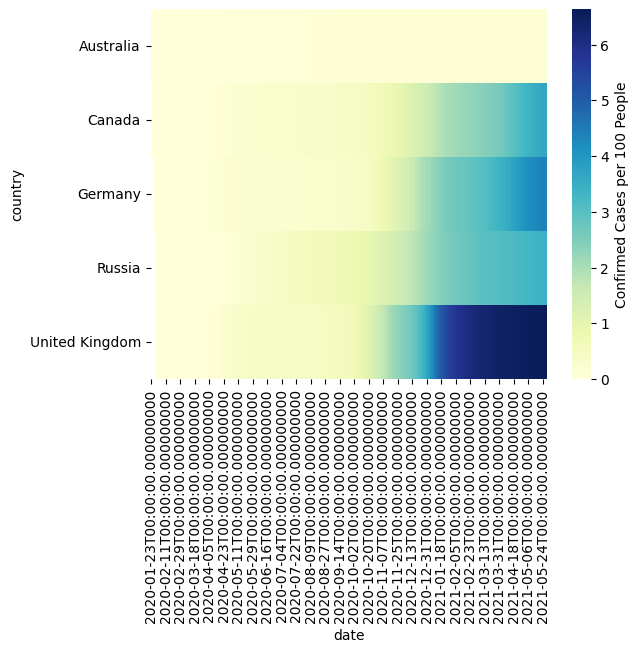

In [47]:
# Построение тепловой карты
sns.heatmap(pivot_df, cmap="YlGnBu", cbar_kws={'label': 'Confirmed Cases per 100 People'})
plt.title("Growth of Confirmed Cases per Hundred by Country")
plt.xlabel("Date")
plt.ylabel("Country")
plt.xticks(rotation=45)
plt.show()

In [48]:
w_vaccinations = covid_df.groupby('date')['daily_vaccinations'].sum().reset_index()

# Строим линейный график с помощью Plotly
fig = px.line(w_vaccinations, x='date', y='daily_vaccinations',
              title='Daily Vaccinations Worldwide',
              labels={'daily_vaccinations': 'Daily Vaccinations', 'date': 'Date'})

# Отображаем график
fig.show()